In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings


df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/np_regression_dataset1.csv')
df.head()

,x,y
0,-5.0,-1.322714
1,-4.8,-0.477538
2,-4.6,0.305064
3,-4.4,1.505136
4,-4.2,1.684154


Text(0.5, 1.0, 'Nonlinear regression data')

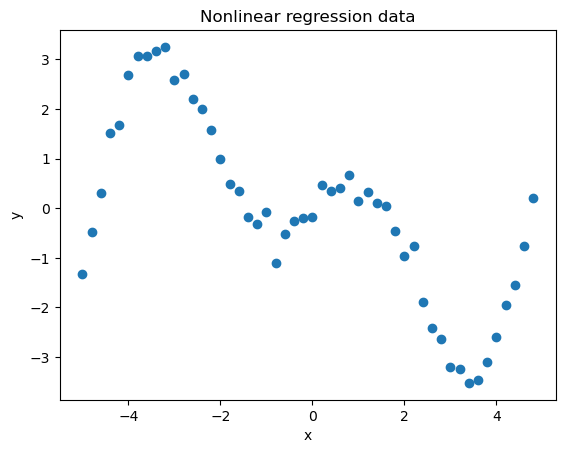

In [5]:
plt.figure() #plotting the data
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear regression data')